# Práctica 2: Regresión logística

#### Realizado por Javier Gómez Moraleda y Unai Piris Ibañez

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
import scipy.optimize as opt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Función que carga los datos
def carga_csv(file_name):
    valores = read_csv(file_name, header = None).to_numpy()
    return valores.astype(float)

## Parte 1: Regresión logística sin regularizar

In [3]:
# Calcula el valor de la función sigmoide
def sigmoid(X):
    z = 1/(1 + np.exp(-X))
    return z

In [4]:
# Calcula la función de coste
def fun_coste (thetas, X, Y):
    H = sigmoid(np.dot(X, thetas))
    Term1 = np.matmul(Y, np.log(H))
    Term2 = np.matmul((1 - Y), np.log(1 - H))
    cost = (- 1 / (len(Y))) * np.sum(Term1 + Term2)
    
    return cost

In [5]:
# Calcula el gradiente
def gradient(thetas, X, Y):
    H = sigmoid(np.dot(X, thetas))
    Dif = H - Y
    grad = (1 / len(Y)) * np.matmul(Dif, X)

    return grad

In [6]:
# Calcula la predicción
def predict(X, Y, theta_opt):
    Y_prediccion = np.round(sigmoid(np.dot(X, theta_opt)))
    return Y_prediccion

In [7]:
# Calcula la precisión
def accuracy(Y, Y_prediccion, m):
    return np.sum((Y == np.array(Y_prediccion))) / m

In [8]:
# Dibuja la frontera de decisión 
def pinta_frontera_recta(X, Y, theta):
    plt.figure()
    x1_min, x1_max = X[:, 1].min(), X[:, 2].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 2].max()
    
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
    np.linspace(x2_min, x2_max))
    
    h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0], 1)),
    xx1.ravel(),
    xx2.ravel()].dot(theta))
    h = h.reshape(xx1.shape)
    
    # el cuarto parámetro es el valor de z cuya frontera se
    # quiere pintar
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
    plt.scatter(X[pos, 1], X[pos, 2], marker ="+", c="k")
    plt.scatter(X[neg, 1], X[neg, 2], marker =".", c="y")
    #plt.savefig("frontera.pdf")
    plt.show()
    plt.close()

### Observando resultados

#### Visualización de los datos

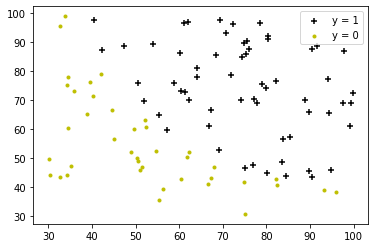

In [9]:
# Cargamos los datos
datos = carga_csv('ex2data1.csv')

# Separamos las variables del resultado
X = datos[:,:-1]
Y = datos[:, -1]

# Añadimos una columna de 1's
X = np.hstack([np.ones([np.shape(X)[0], 1]), X])

# Filas y columnas
m = np.shape(X)[0]
n = np.shape(X)[1]

# Dibuja los ejemplos positivos
pos = np.where (Y == 1)
plt.scatter(X[pos, 1], X[pos, 2], marker='+', c='k' )

# Dibuja los ejemplos negativos
neg = np.where (Y == 0)
plt.scatter(X[neg, 1], X[neg, 2], marker='.', c = 'y')
plt.legend(["y = 1", "y = 0"])

En este gráfico podemos observar los puntos negativos (y = 0) y los positivos. Se aprecia una división clara entre ambos, por lo que podremos aplicar regresión logística para lograr una división mediante una recta.

#### Resultados óptimos

In [10]:
# Calculamos los resultados óptimos
thetas = np.zeros(n)
result = opt.fmin_tnc(func=fun_coste, x0=thetas, fprime=gradient, args=(X, Y))
theta_opt = result[0]
coste = fun_coste(theta_opt, X, Y)
print("Coste óptimo: ", coste)

Coste óptimo:  0.2034977015894746


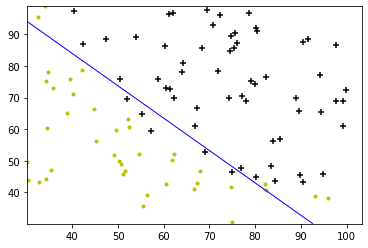

Porcentaje aciertos:  89.0 %


In [11]:
# Dibuja la frontera
pinta_frontera_recta(X, Y, theta_opt);
print("Porcentaje aciertos: ", accuracy(Y, predict(X,Y,theta_opt), m)*100, "%")

Observando el resultado óptimo del algoritmo, se observa que realiza una división aceptable, con un porcentaje de aciertos cercano al 90%. 

## Parte 2: Regresión logística regularizada

In [12]:
# Calcula la función de coste regularizada
def fun_coste_reg(thetas, X, Y, lam):
    H = sigmoid(np.dot(X, thetas))
    m = len(Y)
    Term1 = np.matmul(Y, np.log(H))
    Term2 = np.matmul((1 - Y), np.log(1 - H))
    cost = (- np.sum(Term1 + Term2) / m)  + (lam / (2*m)) * np.sum(np.square(thetas))
    
    return cost

In [13]:
# Calcula el gradiente
def gradient_reg(thetas, X, Y, lam):
    H = sigmoid(np.dot(X, thetas))
    m = len(Y)
    Dif = H - Y
    grad = (np.matmul(Dif, X) / m)  + (lam / m) * thetas

    return grad

In [14]:
# Dibuja la gráfica de la regresión regularizada
def plot_decisionboundary(X, Y, thetas, poly):
    plt.figure()
    
    pos_pass = np.where(Y == 1)
    pos_fail = np.where(Y == 0)
    x1_min, x1_max = X[:,1].min(), X[:,1].max()
    x2_min, x2_max = X[:,2].min(), X[:,2].max()
    
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(thetas))
    h = h.reshape(xx1.shape)
    
    plt.scatter(X[pos_pass, 1], X[pos_pass, 2], marker ="+", c="k")
    plt.scatter(X[pos_fail, 1], X[pos_fail, 2], marker =".", c="y")
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')
    
    plt.show()
    plt.close()

### Observando resultados

#### Visualización de los datos

Text(0, 0.5, 'Microchip test 2')

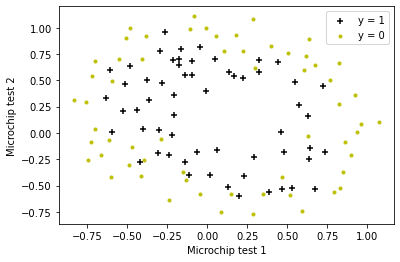

In [15]:
# Cargamos los datos
datos = carga_csv('ex2data2.csv')

# Separamos las variables del resultado
X = datos[:,:-1]
Y = datos[:, -1]

# Dibuja los ejemplos positivos
pos = np.where (Y == 1)
plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='k' )

# Dibuja los ejemplos negativos
neg = np.where (Y == 0)
plt.scatter(X[neg, 0], X[neg, 1], marker='.', c = 'y')
plt.legend(["y = 1", "y = 0"])
plt.xlabel("Microchip test 1")
plt.ylabel("Microchip test 2")

#### Resultados óptimos con distintos valores de lambda

Número de atributos:  28


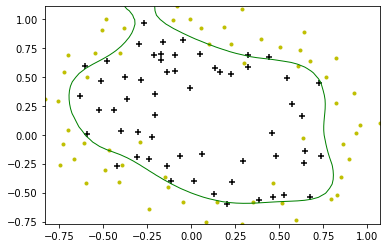

Valor de lambda:  1e-05
Porcentaje aciertos:  87.28813559322035 %


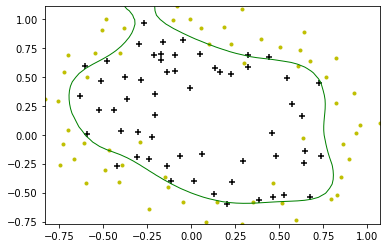

Valor de lambda:  1e-05
Porcentaje aciertos:  87.28813559322035 %


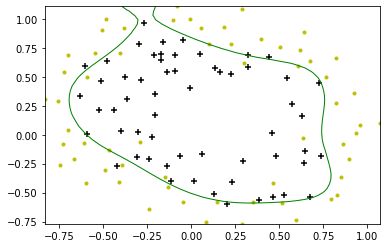

Valor de lambda:  0.0001
Porcentaje aciertos:  86.4406779661017 %


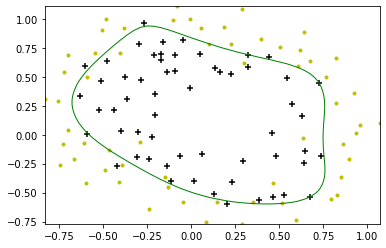

Valor de lambda:  0.001
Porcentaje aciertos:  85.59322033898306 %


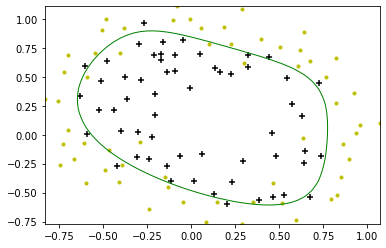

Valor de lambda:  0.01
Porcentaje aciertos:  83.89830508474576 %


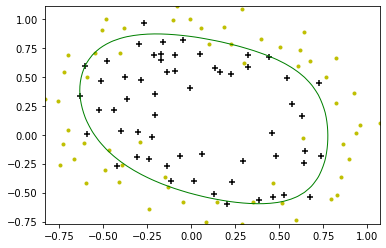

Valor de lambda:  0.1
Porcentaje aciertos:  83.89830508474576 %


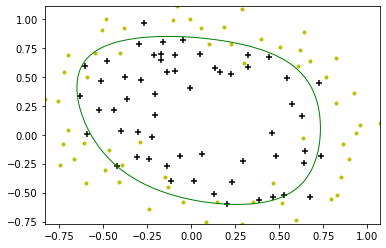

Valor de lambda:  1
Porcentaje aciertos:  81.35593220338984 %


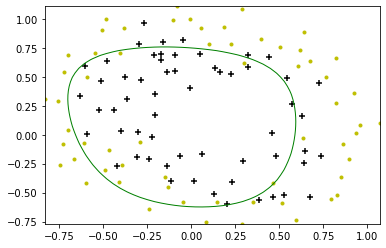

Valor de lambda:  10
Porcentaje aciertos:  74.57627118644068 %


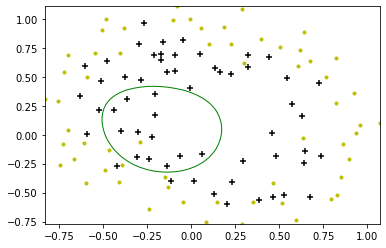

Valor de lambda:  100
Porcentaje aciertos:  60.16949152542372 %


In [19]:
# Probamos distintos valores de lambda
lamlist = [0.00001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Ampliamos los atributos a 28
poly = PolynomialFeatures(6)
X_ext = poly.fit_transform(X)
print("Número de atributos: ", len(X_ext[0, :]))

# Filas y columnas
m = np.shape(X)[0]
n = np.shape(X_ext)[1]

# Bucle dibujando las lambdas
for lam in lamlist:   
    thetas = np.zeros(n)
    result = opt.fmin_tnc(func=fun_coste_reg, x0=thetas, fprime=gradient_reg, args=(X_ext, Y, lam))
    theta_opt = result[0]
    
    plot_decisionboundary(X_ext, Y, theta_opt, poly)
    print("Valor de lambda: ", lam)
    print("Porcentaje aciertos: ", accuracy(Y, predict(X_ext,Y,theta_opt), m)*100, "%")

Como hemos escogido un amplio espectro de lambdas, hemos podido comprobar como evoluciona el algoritmo a medida que modificamos dicho parámetro. 

Cuando el valor de lambda es extremadamente pequeño (0.00001), encontramos el punto donde mayor porcentaje de aciertos tenemos. Sin embargo, a pesar de que en un primer instante pueda parecer positivo, no lo es, puestro que nuestro modelo ha "sobreaprendido" y se ajusta en exceso a nuestros datos de entrenamiento.  

En el otro extremo, cuando el valor de lambda es muy alto (100), vemos como tenemos un porcentaje bajo de aciertos, cosa que no nos interesa. 

En conclusión, consideramos que el valor adecuado de lambda deberia encontrarse entre 1 y 0.001, puesto que es el intervalo donde obtenemos resultados razonables, sin hacer que nuestro modelo sobreaprenda.